In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
from keras.models import load_model
from time import time
from tensorflow.python.keras.callbacks import TensorBoard
from sklearn.metrics import roc_curve, auc
%matplotlib inline

In [2]:
print(tf.__version__)
print(keras.__version__)

2.6.0
2.6.0


# Image Preparation


In [3]:
train_path='dataset/train'
valid_path='dataset/valid'
test_path='dataset/test'

In [4]:
train_batches=ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(train_path,target_size=(224,224),batch_size=10)
valid_batches=ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(valid_path,target_size=(224,224),batch_size=10)
test_batches=ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(test_path,target_size=(224,224),batch_size=10,shuffle=False)

Found 900 images belonging to 3 classes.
Found 120 images belonging to 3 classes.
Found 120 images belonging to 3 classes.


# Modify Model

In [5]:
mobile1=keras.applications.mobilenet.MobileNet()

In [6]:
mobile1.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [7]:
#remove last 6 layers & add dense layer which has 3 outputs 
x=mobile1.layers[-6].output
predictions=Dense(3,activation='softmax')(x)
model=Model(inputs=mobile1.input,outputs=predictions)

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

In [9]:
for layer in model.layers[:-5]:
    layer.trainable=False

# Train the model

In [ ]:
tensorboard=TensorBoard(log_dir="logs/{}".format(time()))
model.compile(Adam(lr=.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit_generator(train_batches,steps_per_epoch=96,validation_data=valid_batches,validation_steps=9,epochs=10,verbose=2,callbacks=[tensorboard])

In [ ]:
model.save(filepath="save_model/")

# Predict

In [10]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

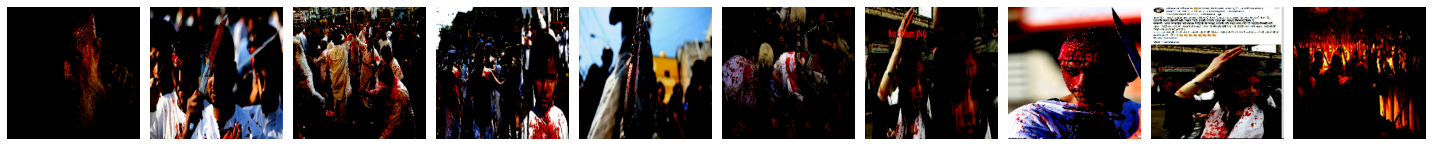

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [11]:
test_imgs,test_labels=next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [12]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [13]:
predictions=model.predict(x=test_batches,verbose=0)

In [14]:
np.round(predictions)

array([[0., 0., 1.],
       [0., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1

In [15]:
cm=confusion_matrix(y_true=test_batches.classes,y_pred=np.argmax(predictions,axis=-1))

In [16]:
scores=keras.metrics.categorical_accuracy(test_batches.classes, np.argmax(predictions,axis=-1))
print(scores)

tf.Tensor(0.0, shape=(), dtype=float32)


In [17]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [18]:
test_batches.class_indices

{'0': 0, '1': 1, '2': 2}

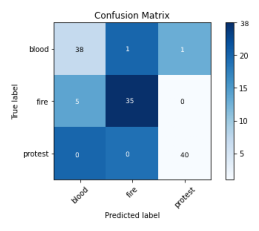

In [40]:
cm_plot_labels=['blood','fire','protest']
plt.figure()
plot_confusion_matrix(cm,cm_plot_labels,title='Confusion Matrix')

# Model evaluation


In [20]:
yTrue = test_batches.classes
yPred = np.argmax(predictions,axis=-1)

sum(yPred == yTrue)
len(yPred)


CalculatedAccuracy = sum(yPred == yTrue)/len(yPred)
print("Calculated Accuracy")
print(CalculatedAccuracy*100)

Calculated Accuracy
94.0


# Save trained keras model

In [ ]:
model.save('action_classifer.h5')

# Do predictions from saved model

In [24]:
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img 
import datetime
import time
model=load_model('save_model/action_classifer.h5')

# Prediction

In [ ]:
0 - blood
1 - fire
2 - protest

[[9.4437796e-01 5.9260589e-07 5.5621501e-02]]
[[9.4437796e-01 5.9260589e-07 5.5621501e-02]]
0


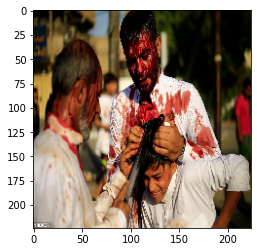

In [25]:
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input

img_path = 'dataset/test/0/44EBB95600000578-0-Iraqi_Shi_ite_Muslims_gash_the_forehead_of_a_boy_with_a_sword_du-a-79_1506882496058.jpg'
img = image.load_img(img_path, target_size=(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
# predicted_level=round(model.predict(x))
# print(predicted_level)
print(model.predict(x))
plt.imshow(img)
maxElement = np.amax(model.predict(x))
result=model.predict(x)
print(result)
plt.imshow(img)
maxElement = np.amax(result)
maxElement
print(result.argmax())

[[1.9895678e-07 1.9394805e-05 9.9998045e-01]]
[[1.9895678e-07 1.9394805e-05 9.9998045e-01]]
1


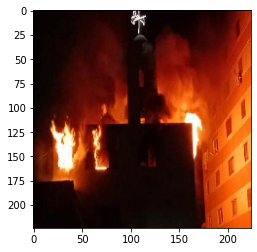

In [33]:
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input

img_path = 'dataset/test/1/fire.20.png'
img = image.load_img(img_path, target_size=(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
# predicted_level=round(model.predict(x))
# print(predicted_level)
print(model.predict(x))
plt.imshow(img)
maxElement = np.amax(model.predict(x))
result=model.predict(x)
print(result)
plt.imshow(img)
maxElement = np.amax(result)
maxElement
print(result.argmax())

[[4.6521348e-01 2.0002315e-04 5.3458649e-01]]
[[4.6521348e-01 2.0002315e-04 5.3458649e-01]]
2


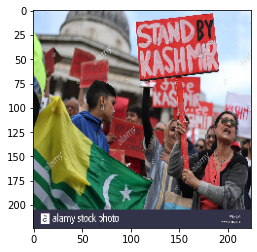

In [30]:
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input

img_path = 'dataset/test/2/protest (40).jpg'
img = image.load_img(img_path, target_size=(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
# predicted_level=round(model.predict(x))
# print(predicted_level)
print(model.predict(x))
plt.imshow(img)
maxElement = np.amax(model.predict(x))
result=model.predict(x)
print(result)
plt.imshow(img)
maxElement = np.amax(result)
maxElement
print(result.argmax())